In [2]:
import pandas as pd


file_path = './광고성과트래킹(~6:28).csv'
df = pd.read_csv(file_path, encoding= 'utf-8-sig')

In [3]:
df

,매체,광고 세트,소재,광고 시작일,광고 종료일,캠페인 목표,지출금액,광고 결과,결과 당 비용,도달,...,CTR(전체),CPC(전체),CPM,빈도,게시물 참여,고객 전환,고객 획득 당 비용,번호 수집,비고,on/off
0,팝업스토어가자,1차,1안,2024.5.23,2024.5.27,트래픽,"₩259,414","1,054",₩246,"37,127",...,3.60%,₩170,"₩6,116",1.14,"8,653",129.0,"₩2,011",NaN,NaN,off
1,팝업스토어가자,1차,2안,2024.5.23,2024.5.27,트래픽,"₩23,585",71,₩332,"2,925",...,3.07%,₩241,"₩7,386",1.09,726,5.0,"₩4,717",NaN,NaN,off
2,팝업스토어가자,1차,3안,2024.5.23,2024.5.27,트래픽,"₩1,798",7,₩257,151,...,4.60%,₩225,"₩10,333",1.15,7,0.0,0,NaN,NaN,off
3,팝업스토어가자,1차,4안,2024.5.23,2024.5.27,트래픽,"₩14,832",46,₩322,"1,465",...,3.47%,₩243,"₩8,446",1.20,51,9.0,"₩1,648",NaN,NaN,off
4,팝업스토어가자,1차,5안,2024.5.23,2024.5.27,트래픽,₩371,1,₩371,38,...,2.56%,₩371,"₩9,513",1.03,8,0.0,0,NaN,NaN,off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,팝업스토어가자,4차,20안,2024.6.20,2024.6.30,트래픽,"₩44,622",75,₩595,"9,350",...,0.78%,₩460,"₩3,618",1.32,78,1.0,"₩44,622",NaN,이벤트,off
64,팝업스토어가자,4차,21안,2024.6.14,2024.6.30,트래픽,"₩99,896",261,₩383,"9,024",...,2.51%,₩352,"₩8,836",1.25,"2,230",0.0,₩0,X,NaN,off
65,팝업스토어가자,4차,21안,2024.6.14,2024.6.30,트래픽,"₩70,872",197,₩360,"5,548",...,2.83%,₩341,"₩9,649",1.20,"1,345",1.0,"₩70,872",O,NaN,off
66,팝업스토어가자,4차,25안,2024.6.1,2024.6.28,트래픽,"₩3,864",10,₩386,583,...,2.27%,₩276,"₩6,271",1.05,12,0.0,₩276,NaN,NaN,on


In [4]:
df.columns

Index(['매체', '광고 세트', '소재', '광고 시작일', '광고 종료일', '캠페인 목표', '지출금액', '광고 결과',
       '결과 당 비용', '도달', '노출', 'CTR(전체)', 'CPC(전체)', 'CPM', '빈도', '게시물 참여',
       '고객 전환', '고객 획득 당 비용', '번호 수집', '비고', 'on/off'],
      dtype='object')

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df = df.dropna(subset = ['결과 당 비용', '고객 획득 당 비용','도달','노출','CTR(전체)','CPC(전체)','CPM','게시물 참여'])


In [7]:
df['결과 당 비용'] = df['결과 당 비용'].replace({'₩': '', ',': ''},regex= True).astype(float)
df['고객 획득 당 비용'] = df['고객 획득 당 비용'].replace({'₩': '', ',': ''}, regex=True).astype(float)
df['도달'] = df['도달'].replace({',':''},regex=True).astype(int)
df['노출'] = df['노출'].replace({',': ''}, regex=True).astype(int)
df['CTR(전체)'] = df['CTR(전체)'].replace({'%':''}, regex=True).astype(float) / 100 
df['CPC(전체)'] = df['CPC(전체)'].replace({'₩':''},regex=True).astype(float)
df['CPM'] = df['CPM'].replace({'₩':'',',':''},regex=True).astype(float)
df['게시물 참여'] = df['게시물 참여'].replace({',':''},regex=True).astype(float)
df['고객 전환'] = df['고객 전환'].astype(int)







In [8]:
def score_ad(row):
    
    result_cost_score = row['결과 당 비용'] if row['결과 당 비용'] != 0 else float('inf')
    acquisition_cost_score = row['고객 획득 당 비용'] if row['고객 획득 당 비용'] != 0 else float('inf')
    reach_score = row['도달']
    impressions_score = row['노출']
    ctr_score = row['CTR(전체)']
    cpc_score = row['CPC(전체)'] if row['CPC(전체)'] != 0 else float('inf')
    cpm_score = row['CPM'] if row['CPM'] != 0 else float('inf')
    engagement_score = row['게시물 참여']

    #가중치 지정 
    weights = {
        'result_cost': 0.2,
        'acquisition_cost': 0.2,
        'reach': 0.1,
        'impressions': 0.1,
        'ctr': 0.15,
        'cpc': 0.1,
        'cpm': 0.1,
        'engagement': 0.05
    }
    # 가중치 적용한 score만들어주기 
    score = (weights['result_cost'] / result_cost_score +
             weights['acquisition_cost'] / acquisition_cost_score +
             weights['reach'] * reach_score +
             weights['impressions'] * impressions_score +
             weights['ctr'] * ctr_score +
             weights['cpc'] / cpc_score +
             weights['cpm'] / cpm_score +
             weights['engagement'] * engagement_score)
    
    return score


def score_ad_conversions(row):
    conversion_score = row['고객 전환']
    return conversion_score


df['종합 광고 성과'] = df.apply(score_ad,axis= 1)
df['고객 전환 성과'] = df.apply(score_ad_conversions , axis =1)






In [9]:
top_perform_ads = df.sort_values(by='종합 광고 성과', ascending= False).head(10)
top_conversion_ads = df.sort_values(by = '고객 전환 성과' ,ascending= False).head(10)


In [10]:
top_perform_ads

,매체,광고 세트,소재,광고 시작일,광고 종료일,캠페인 목표,지출금액,광고 결과,결과 당 비용,도달,...,CPM,빈도,게시물 참여,고객 전환,고객 획득 당 비용,번호 수집,비고,on/off,종합 광고 성과,고객 전환 성과
0,팝업스토어가자,1차,1안,2024.5.23,2024.5.27,트래픽,"₩259,414","1,054",246.0,37127,...,6116.0,1.14,8653.0,129,2011.0,NaN,NaN,off,8387.156917,129
16,팝콘,2차,2안,2024.5.29,2024.6.13,트래픽,"₩245,870",840,293.0,22282,...,8689.0,1.27,5998.0,116,2120.0,NaN,NaN,off,5357.807249,116
62,팝업스토어가자,4차,19안,2024.6.20,2024.6.30,트래픽,"₩55,378",71,780.0,16426,...,2687.0,1.25,77.0,3,18459.0,NaN,이벤트,off,3707.251131,3
31,팝콘,4차,10안,2024.6.14,2024.6.17,트래픽,"₩68,455",582,118.0,12044,...,5348.0,1.06,3975.0,0,0.0,NaN,NaN,off,2683.059573,0
6,팝콘,1차,2안,2024.5.23,2024.5.27,트래픽,"₩132,418",407,325.0,11060,...,10052.0,1.19,2695.0,72,1839.0,NaN,NaN,off,2558.057484,72
63,팝업스토어가자,4차,20안,2024.6.20,2024.6.30,트래픽,"₩44,622",75,595.0,9350,...,3618.0,1.32,78.0,1,44622.0,NaN,이벤트,off,2172.401756,1
64,팝업스토어가자,4차,21안,2024.6.14,2024.6.30,트래픽,"₩99,896",261,383.0,9024,...,8836.0,1.25,2230.0,0,0.0,X,NaN,off,2144.404583,0
46,팝콘,4차,27안,2024.6.14,2024.6.30,트래픽,"₩84,813",206,411.0,9397,...,7778.0,1.16,221.0,3,28271.0,NaN,NaN,on,2041.054138,3
10,팝업,1차,1안,2024.5.23,2024.5.27,트래픽,"₩84,526",226,374.0,7748,...,9964.0,1.09,1983.0,22,3842.0,NaN,NaN,off,1722.256519,22
28,팝업스토어가자,3차,10안,2024.6.8,2024.6.17,트래픽,"₩44,759",234,191.0,7252,...,6053.0,1.02,3128.0,5,8952.0,NaN,NaN,off,1621.107946,5


In [11]:
top_conversion_ads

,매체,광고 세트,소재,광고 시작일,광고 종료일,캠페인 목표,지출금액,광고 결과,결과 당 비용,도달,...,CPM,빈도,게시물 참여,고객 전환,고객 획득 당 비용,번호 수집,비고,on/off,종합 광고 성과,고객 전환 성과
0,팝업스토어가자,1차,1안,2024.5.23,2024.5.27,트래픽,"₩259,414","1,054",246.0,37127,...,6116.0,1.14,8653.0,129,2011.0,NaN,NaN,off,8387.156917,129
16,팝콘,2차,2안,2024.5.29,2024.6.13,트래픽,"₩245,870",840,293.0,22282,...,8689.0,1.27,5998.0,116,2120.0,NaN,NaN,off,5357.807249,116
34,팝콘,4차,15안,2024.6.17,2024.6.30,트래픽,"₩100,864",250,403.0,6537,...,13257.0,1.16,1208.0,80,1261.0,O,NaN,on,1474.907438,80
6,팝콘,1차,2안,2024.5.23,2024.5.27,트래픽,"₩132,418",407,325.0,11060,...,10052.0,1.19,2695.0,72,1839.0,NaN,NaN,off,2558.057484,72
10,팝업,1차,1안,2024.5.23,2024.5.27,트래픽,"₩84,526",226,374.0,7748,...,9964.0,1.09,1983.0,22,3842.0,NaN,NaN,off,1722.256519,22
11,팝업,1차,2안,2024.5.23,2024.5.27,트래픽,"₩59,467",156,381.0,5644,...,9993.0,1.05,1438.0,19,3130.0,NaN,NaN,off,1231.406598,19
40,팝콘,4차,15안,2024.6.20,2024.6.30,트래픽,"₩25,827",69,374.0,1779,...,13306.0,1.09,309.0,15,1722.0,X,NaN,off,387.458109,15
23,팝업스토어가자,2차,2안,2024.5.29,2024.6.3,트래픽,"₩43,405",163,266.0,6710,...,5922.0,1.09,1790.0,12,3617.0,NaN,NaN,off,1493.405832,12
3,팝업스토어가자,1차,4안,2024.5.23,2024.5.27,트래픽,"₩14,832",46,322.0,1465,...,8446.0,1.20,51.0,9,1648.0,NaN,NaN,off,324.656371,9
1,팝업스토어가자,1차,2안,2024.5.23,2024.5.27,트래픽,"₩23,585",71,332.0,2925,...,7386.0,1.09,726.0,5,4717.0,NaN,NaN,off,648.105678,5


In [12]:
# 3번에 대한

combined_ads = pd.concat([top_perform_ads , top_conversion_ads]).drop_duplicates().reset_index(drop=True)



In [13]:
combined_ads

,매체,광고 세트,소재,광고 시작일,광고 종료일,캠페인 목표,지출금액,광고 결과,결과 당 비용,도달,...,CPM,빈도,게시물 참여,고객 전환,고객 획득 당 비용,번호 수집,비고,on/off,종합 광고 성과,고객 전환 성과
0,팝업스토어가자,1차,1안,2024.5.23,2024.5.27,트래픽,"₩259,414","1,054",246.0,37127,...,6116.0,1.14,8653.0,129,2011.0,NaN,NaN,off,8387.156917,129
1,팝콘,2차,2안,2024.5.29,2024.6.13,트래픽,"₩245,870",840,293.0,22282,...,8689.0,1.27,5998.0,116,2120.0,NaN,NaN,off,5357.807249,116
2,팝업스토어가자,4차,19안,2024.6.20,2024.6.30,트래픽,"₩55,378",71,780.0,16426,...,2687.0,1.25,77.0,3,18459.0,NaN,이벤트,off,3707.251131,3
3,팝콘,4차,10안,2024.6.14,2024.6.17,트래픽,"₩68,455",582,118.0,12044,...,5348.0,1.06,3975.0,0,0.0,NaN,NaN,off,2683.059573,0
4,팝콘,1차,2안,2024.5.23,2024.5.27,트래픽,"₩132,418",407,325.0,11060,...,10052.0,1.19,2695.0,72,1839.0,NaN,NaN,off,2558.057484,72
5,팝업스토어가자,4차,20안,2024.6.20,2024.6.30,트래픽,"₩44,622",75,595.0,9350,...,3618.0,1.32,78.0,1,44622.0,NaN,이벤트,off,2172.401756,1
6,팝업스토어가자,4차,21안,2024.6.14,2024.6.30,트래픽,"₩99,896",261,383.0,9024,...,8836.0,1.25,2230.0,0,0.0,X,NaN,off,2144.404583,0
7,팝콘,4차,27안,2024.6.14,2024.6.30,트래픽,"₩84,813",206,411.0,9397,...,7778.0,1.16,221.0,3,28271.0,NaN,NaN,on,2041.054138,3
8,팝업,1차,1안,2024.5.23,2024.5.27,트래픽,"₩84,526",226,374.0,7748,...,9964.0,1.09,1983.0,22,3842.0,NaN,NaN,off,1722.256519,22
9,팝업스토어가자,3차,10안,2024.6.8,2024.6.17,트래픽,"₩44,759",234,191.0,7252,...,6053.0,1.02,3128.0,5,8952.0,NaN,NaN,off,1621.107946,5


In [14]:
top_perform_ads['source'] = 'performance'
top_conversion_ads['source'] = 'conversion'

final_ads = pd.concat([top_perform_ads, top_conversion_ads]).drop_duplicates().reset_index(drop=True)

In [15]:
final_ads

,매체,광고 세트,소재,광고 시작일,광고 종료일,캠페인 목표,지출금액,광고 결과,결과 당 비용,도달,...,빈도,게시물 참여,고객 전환,고객 획득 당 비용,번호 수집,비고,on/off,종합 광고 성과,고객 전환 성과,source
0,팝업스토어가자,1차,1안,2024.5.23,2024.5.27,트래픽,"₩259,414","1,054",246.0,37127,...,1.14,8653.0,129,2011.0,NaN,NaN,off,8387.156917,129,performance
1,팝콘,2차,2안,2024.5.29,2024.6.13,트래픽,"₩245,870",840,293.0,22282,...,1.27,5998.0,116,2120.0,NaN,NaN,off,5357.807249,116,performance
2,팝업스토어가자,4차,19안,2024.6.20,2024.6.30,트래픽,"₩55,378",71,780.0,16426,...,1.25,77.0,3,18459.0,NaN,이벤트,off,3707.251131,3,performance
3,팝콘,4차,10안,2024.6.14,2024.6.17,트래픽,"₩68,455",582,118.0,12044,...,1.06,3975.0,0,0.0,NaN,NaN,off,2683.059573,0,performance
4,팝콘,1차,2안,2024.5.23,2024.5.27,트래픽,"₩132,418",407,325.0,11060,...,1.19,2695.0,72,1839.0,NaN,NaN,off,2558.057484,72,performance
5,팝업스토어가자,4차,20안,2024.6.20,2024.6.30,트래픽,"₩44,622",75,595.0,9350,...,1.32,78.0,1,44622.0,NaN,이벤트,off,2172.401756,1,performance
6,팝업스토어가자,4차,21안,2024.6.14,2024.6.30,트래픽,"₩99,896",261,383.0,9024,...,1.25,2230.0,0,0.0,X,NaN,off,2144.404583,0,performance
7,팝콘,4차,27안,2024.6.14,2024.6.30,트래픽,"₩84,813",206,411.0,9397,...,1.16,221.0,3,28271.0,NaN,NaN,on,2041.054138,3,performance
8,팝업,1차,1안,2024.5.23,2024.5.27,트래픽,"₩84,526",226,374.0,7748,...,1.09,1983.0,22,3842.0,NaN,NaN,off,1722.256519,22,performance
9,팝업스토어가자,3차,10안,2024.6.8,2024.6.17,트래픽,"₩44,759",234,191.0,7252,...,1.02,3128.0,5,8952.0,NaN,NaN,off,1621.107946,5,performance


In [16]:
### 고객 전환과 광고 성과 지표 사이의 인과관계를 현재 모르는 상태이기에 2가지 갈래로 나누어 상위 rank를 리스트업 
### 1. 1번의 리스트 + 2번 리스트 를 합친 후 중복된 소재에 대해서 제거 
### 2. 고객 전환의 컬럼까지 합한 후에 이에 가장 큰 가중치를 주고 다시 한번 10개의 소재를 추출



In [17]:
def final_score(row):
    return 0.25 * row['종합 광고 성과'] + 0.75 * row['고객 전환 성과'] 

df['final_score'] = df.apply(final_score, axis = 1)

In [18]:
df

,매체,광고 세트,소재,광고 시작일,광고 종료일,캠페인 목표,지출금액,광고 결과,결과 당 비용,도달,...,빈도,게시물 참여,고객 전환,고객 획득 당 비용,번호 수집,비고,on/off,종합 광고 성과,고객 전환 성과,final_score
0,팝업스토어가자,1차,1안,2024.5.23,2024.5.27,트래픽,"₩259,414","1,054",246.0,37127,...,1.14,8653.0,129,2011.0,NaN,NaN,off,8387.156917,129,2193.539229
1,팝업스토어가자,1차,2안,2024.5.23,2024.5.27,트래픽,"₩23,585",71,332.0,2925,...,1.09,726.0,5,4717.0,NaN,NaN,off,648.105678,5,165.776420
2,팝업스토어가자,1차,3안,2024.5.23,2024.5.27,트래픽,"₩1,798",7,257.0,151,...,1.15,7.0,0,0.0,NaN,NaN,off,32.858132,0,8.214533
3,팝업스토어가자,1차,4안,2024.5.23,2024.5.27,트래픽,"₩14,832",46,322.0,1465,...,1.20,51.0,9,1648.0,NaN,NaN,off,324.656371,9,87.914093
4,팝업스토어가자,1차,5안,2024.5.23,2024.5.27,트래픽,₩371,1,371.0,38,...,1.03,8.0,0,0.0,NaN,NaN,off,8.104659,0,2.026165
5,팝콘,1차,1안,2024.5.23,2024.5.27,트래픽,"₩11,009",17,648.0,985,...,1.03,269.0,1,11009.0,NaN,NaN,off,213.454094,1,54.113523
6,팝콘,1차,2안,2024.5.23,2024.5.27,트래픽,"₩132,418",407,325.0,11060,...,1.19,2695.0,72,1839.0,NaN,NaN,off,2558.057484,72,693.514371
7,팝콘,1차,3안,2024.5.23,2024.5.27,트래픽,"₩1,805",5,361.0,121,...,1.10,5.0,2,903.0,NaN,NaN,off,25.656700,2,7.914175
8,팝콘,1차,4안,2024.5.23,2024.5.27,트래픽,"₩4,393",9,488.0,286,...,1.09,10.0,3,1464.0,NaN,NaN,off,60.206114,3,17.301529
9,팝콘,1차,5안,2024.5.23,2024.5.27,트래픽,₩375,1,375.0,47,...,1.04,16.0,0,0.0,NaN,NaN,off,10.403873,0,2.600968


In [19]:
top_final_ads = df.sort_values(by = 'final_score' , ascending= False).head(10)

In [20]:
top_final_ads
#전환에 75% 가중치 + 광고 성과 지표 25% 가중치 

,매체,광고 세트,소재,광고 시작일,광고 종료일,캠페인 목표,지출금액,광고 결과,결과 당 비용,도달,...,빈도,게시물 참여,고객 전환,고객 획득 당 비용,번호 수집,비고,on/off,종합 광고 성과,고객 전환 성과,final_score
0,팝업스토어가자,1차,1안,2024.5.23,2024.5.27,트래픽,"₩259,414","1,054",246.0,37127,...,1.14,8653.0,129,2011.0,NaN,NaN,off,8387.156917,129,2193.539229
16,팝콘,2차,2안,2024.5.29,2024.6.13,트래픽,"₩245,870",840,293.0,22282,...,1.27,5998.0,116,2120.0,NaN,NaN,off,5357.807249,116,1426.451812
62,팝업스토어가자,4차,19안,2024.6.20,2024.6.30,트래픽,"₩55,378",71,780.0,16426,...,1.25,77.0,3,18459.0,NaN,이벤트,off,3707.251131,3,929.062783
6,팝콘,1차,2안,2024.5.23,2024.5.27,트래픽,"₩132,418",407,325.0,11060,...,1.19,2695.0,72,1839.0,NaN,NaN,off,2558.057484,72,693.514371
31,팝콘,4차,10안,2024.6.14,2024.6.17,트래픽,"₩68,455",582,118.0,12044,...,1.06,3975.0,0,0.0,NaN,NaN,off,2683.059573,0,670.764893
63,팝업스토어가자,4차,20안,2024.6.20,2024.6.30,트래픽,"₩44,622",75,595.0,9350,...,1.32,78.0,1,44622.0,NaN,이벤트,off,2172.401756,1,543.850439
64,팝업스토어가자,4차,21안,2024.6.14,2024.6.30,트래픽,"₩99,896",261,383.0,9024,...,1.25,2230.0,0,0.0,X,NaN,off,2144.404583,0,536.101146
46,팝콘,4차,27안,2024.6.14,2024.6.30,트래픽,"₩84,813",206,411.0,9397,...,1.16,221.0,3,28271.0,NaN,NaN,on,2041.054138,3,512.513535
10,팝업,1차,1안,2024.5.23,2024.5.27,트래픽,"₩84,526",226,374.0,7748,...,1.09,1983.0,22,3842.0,NaN,NaN,off,1722.256519,22,447.064130
34,팝콘,4차,15안,2024.6.17,2024.6.30,트래픽,"₩100,864",250,403.0,6537,...,1.16,1208.0,80,1261.0,O,NaN,on,1474.907438,80,428.726860


In [21]:
## 상관관계 
correlation_matrix= df[['결과 당 비용','고객 획득 당 비용', '도달','노출','CTR(전체)', 'CPC(전체)', 'CPM','게시물 참여','고객 전환']].corr()

In [22]:
correlation_matrix

,결과 당 비용,고객 획득 당 비용,도달,노출,CTR(전체),CPC(전체),CPM,게시물 참여,고객 전환
결과 당 비용,1.000000,0.153243,-0.097429,-0.075841,-0.465498,0.945906,0.209189,-0.282087,-0.129089
고객 획득 당 비용,0.153243,1.000000,0.166808,0.184215,-0.143384,0.194056,0.080652,0.044656,-0.099187
도달,-0.097429,0.166808,1.000000,0.997433,0.140112,-0.133494,-0.142992,0.892786,0.781290
노출,-0.075841,0.184215,0.997433,1.000000,0.117657,-0.110612,-0.141876,0.875706,0.783396
CTR(전체),-0.465498,-0.143384,0.140112,0.117657,1.000000,-0.515452,0.412131,0.342064,0.274190
CPC(전체),0.945906,0.194056,-0.133494,-0.110612,-0.515452,1.000000,0.217039,-0.306438,-0.177791
CPM,0.209189,0.080652,-0.142992,-0.141876,0.412131,0.217039,1.000000,-0.029861,0.146315
게시물 참여,-0.282087,0.044656,0.892786,0.875706,0.342064,-0.306438,-0.029861,1.000000,0.795681
고객 전환,-0.129089,-0.099187,0.781290,0.783396,0.274190,-0.177791,0.146315,0.795681,1.000000


In [25]:
## 한글 깨짐 방지 코드
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


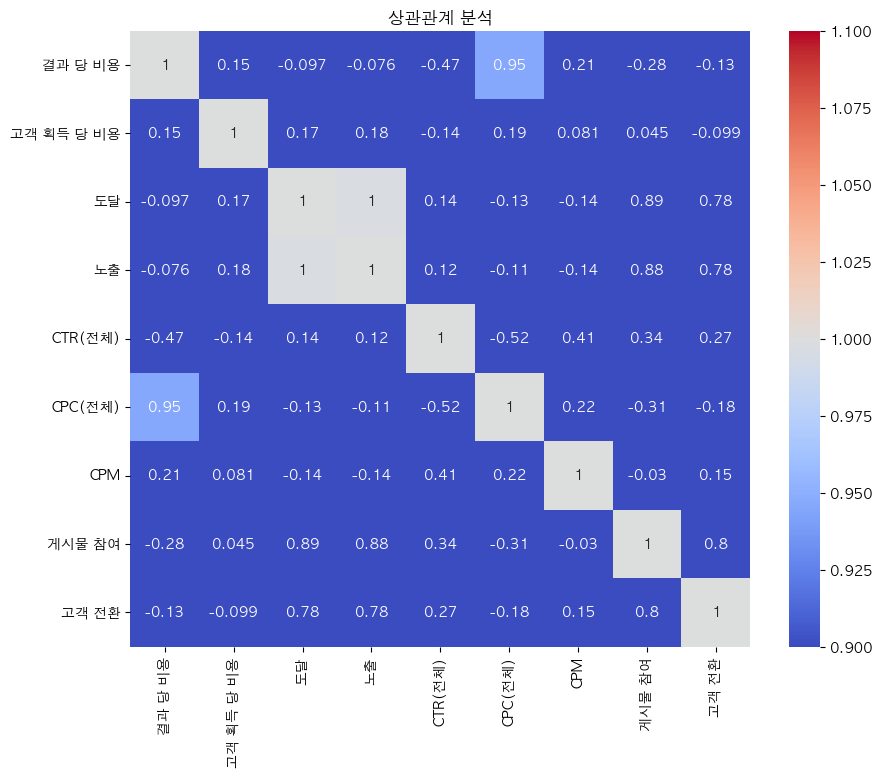

In [27]:
## 시각화 

import seaborn as sns 

plt.figure(figsize = (10,8))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = 1, vmax = 1)
plt.title('상관관계 분석')
plt.show()



In [28]:
### 계정별 분석

account_groups = df.groupby('매체')


In [29]:
account_performance = account_groups.agg({
    '결과 당 비용' : 'mean',
    '고객 획득 당 비용' : 'mean',
    '도달' : 'sum',
    '노출' : 'sum',
    'CTR(전체)' : 'mean',
    'CPC(전체)' : 'mean',
    'CPM' : 'mean',
    '게시물 참여' : 'sum',
    '고객 전환' : 'sum'
}).reset_index()

In [32]:
account_performance

,매체,결과 당 비용,고객 획득 당 비용,도달,노출,CTR(전체),CPC(전체),CPM,게시물 참여,고객 전환
0,팝업,471.200000,1889.800000,13981,15088,0.025340,400.000000,8736.200000,3461.0,43
1,팝업스토어가자,374.407407,6673.851852,117269,137374,0.029493,293.925926,6912.740741,22943.0,172
2,팝콘,391.227273,10012.227273,85276,99756,0.027418,323.590909,8998.954545,18581.0,304


In [ ]:
### 비모수 검정 방법 - anova x / kruskal-Wallis H 



In [33]:
grouped = df.groupby('매체')['고객 전환'].apply(list)



In [34]:
import scipy.stats as stats
kruskal_result = stats.kruskal(*grouped)

print("크루스칼 월리스 H-test p-value : ",kruskal_result.pvalue)

if kruskal_result.pvalue < 0.05 : 
    print('각 계정의 고객 전환 수 차이가 통계적으로 유의미합니다.')

else : 
    print("각 계정의 고객 전환 수 차이가 통계적으로 유의미하지 않습니다.")

크루스칼 월리스 H-test p-value :  0.2704730906499881
각 계정의 고객 전환 수 차이가 통계적으로 유의미하지 않습니다.
